Alright, let's give this modeling another go (with correct data this time)!

In [53]:
# import all the things!
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('../data_sets/job_data_2.csv')

In [3]:
# looks like I might need to reset index to fix whatever the 'Unnamed' column is doing or delete it!
data.head()

,Unnamed: 0,Company Name,High Salary,Job Title,Location,Salary,Summary
0,0,CCC Information Services Inc.,0,Computer Vision Data Scientist,"Chicago, IL 60654 (Loop area)",55000,Computer Vision Data Scientist. Is seeking a C...
1,1,The University of Chicago Medicine,0,Data Scientist,"Chicago, IL",55000,The Data Scientist will also be responsible fo...
2,2,The Boston Consulting Group,0,Knowledge Analyst - Data Engineering,"Chicago, IL 60654 (Loop area)",55000,"Data Engineers, together with Data Scientists,..."
3,3,Inficare,0,Data Scientist,"Chicago, IL",55000,Hands on responsibility as part of the team en...
4,4,Anomalix,0,Data Scientist,"Chicago, IL",55000,Data Scientist Responsibilities will include:....


In [4]:
data.describe()

,Unnamed: 0,High Salary,Salary
count,1814.000000,1814.000000,1814.000000
mean,194.106395,0.331312,82670.893054
std,121.090432,0.470815,20992.795801
min,0.000000,0.000000,55000.000000
25%,90.000000,0.000000,70000.000000
50%,181.500000,0.000000,80000.000000
75%,295.000000,1.000000,105000.000000
max,458.000000,1.000000,120000.000000


In [5]:
data['High Salary'].describe()

count    1814.000000
mean        0.331312
std         0.470815
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: High Salary, dtype: float64

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data.head()

,Company Name,High Salary,Job Title,Location,Salary,Summary
0,CCC Information Services Inc.,0,Computer Vision Data Scientist,"Chicago, IL 60654 (Loop area)",55000,Computer Vision Data Scientist. Is seeking a C...
1,The University of Chicago Medicine,0,Data Scientist,"Chicago, IL",55000,The Data Scientist will also be responsible fo...
2,The Boston Consulting Group,0,Knowledge Analyst - Data Engineering,"Chicago, IL 60654 (Loop area)",55000,"Data Engineers, together with Data Scientists,..."
3,Inficare,0,Data Scientist,"Chicago, IL",55000,Hands on responsibility as part of the team en...
4,Anomalix,0,Data Scientist,"Chicago, IL",55000,Data Scientist Responsibilities will include:....


In [9]:
# need to clean up location columns
data.Location.unique()

array(['Chicago, IL 60654 (Loop area)', 'Chicago, IL',
       'Chicago, IL 60601 (Loop area)',
       'Chicago, IL 60647 (Logan Square area)',
       'Chicago, IL 60642 (Portage Park area)',
       'Chicago, IL 60661 (Near West Side area)',
       'Chicago, IL 60602 (Loop area)', 'Chicago, IL 60604 (Loop area)',
       'Chicago, IL 60606 (Loop area)', 'Chicago, IL 60290 (Loop area)',
       'Deerfield, IL', 'Des Plaines, IL', 'Arlington Heights, IL',
       'Chicago, IL 60611 (Near North Side area)',
       'Chicago, IL 60613 (Uptown area)', 'Lemont, IL',
       'Downers Grove, IL', 'Chicago, IL 60616 (Douglas area)',
       'Chicago, IL 60603 (Loop area)', 'Downers Grove, IL 60515',
       'Glenview, IL', 'Chicago, IL 60631 (Norwood Park area)',
       'Evanston, IL', 'Chicago Heights, IL', 'Abbott Park, IL',
       'Hinsdale, IL', 'Northbrook, IL', 'Wood Dale, IL 60191',
       'Chicago, IL 60660 (Edgewater area)', 'Northbrook, IL 60062',
       'Burr Ridge, IL 60527', 'Wheeling, IL 

In [10]:
# rename
cols = ['Chicago, IL 60654', 'Chicago, IL',
       'Chicago, IL 60601',
       'Chicago, IL 60647',
       'Chicago, IL 60642',
       'Chicago, IL 60661',
       'Chicago, IL 60602', 'Chicago, IL 60604',
       'Chicago, IL 60606', 'Chicago, IL 60290',
       'Deerfield, IL', 'Des Plaines, IL', 'Arlington Heights, IL',
       'Chicago, IL 60611',
       'Chicago, IL 60613', 'Lemont, IL',
       'Downers Grove, IL', 'Chicago, IL 60616',
       'Chicago, IL 60603', 'Downers Grove, IL',
       'Glenview, IL', 'Chicago, IL 60631',
       'Evanston, IL', 'Chicago Heights, IL', 'Abbott Park, IL',
       'Hinsdale, IL', 'Northbrook, IL', 'Wood Dale, IL',
       'Chicago, IL 60660', 'Northbrook, IL',
       'Burr Ridge, IL', 'Wheeling, IL',
       'Westchester, IL', 'Harvey, IL', 'Deerfield, IL',
       'Wood Dale, IL', 'Chicago, IL 60645',
       'Rolling Meadows, IL', 'Elk Grove Village, IL',
       'Oakbrook Terrace, IL', 'Skokie, IL', 'Bloomingdale, IL',
       'McCook, IL', 'Chicago, IL 60605',
       'Tinley Park, IL']

In [17]:
# messy titles
df_locations = pd.get_dummies(data['Location'])
df_locations.head()

,"Abbott Park, IL","Arlington Heights, IL","Bloomingdale, IL 60108","Burr Ridge, IL 60527","Chicago Heights, IL","Chicago, IL","Chicago, IL 60290 (Loop area)","Chicago, IL 60601 (Loop area)","Chicago, IL 60602 (Loop area)","Chicago, IL 60603 (Loop area)",...,"Northbrook, IL","Northbrook, IL 60062","Oakbrook Terrace, IL","Rolling Meadows, IL","Skokie, IL","Tinley Park, IL 60487","Westchester, IL 60154","Wheeling, IL 60090","Wood Dale, IL","Wood Dale, IL 60191"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# cleaned up titles
df_locations.columns = cols
df_locations.head()

,"Chicago, IL 60654","Chicago, IL","Chicago, IL 60601","Chicago, IL 60647","Chicago, IL 60642","Chicago, IL 60661","Chicago, IL 60602","Chicago, IL 60604","Chicago, IL 60606","Chicago, IL 60290",...,"Wood Dale, IL","Chicago, IL 60645","Rolling Meadows, IL","Elk Grove Village, IL","Oakbrook Terrace, IL","Skokie, IL","Bloomingdale, IL","McCook, IL","Chicago, IL 60605","Tinley Park, IL"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here I want to pull common words from job title and job description Possibly put into separate tables, not sure yet

In [22]:
vector_data = CountVectorizer(
    binary=True, # creates binary features (1,0)
    stop_words='english', #ignores common words
    max_features=20) #grabs top ## common words

In [24]:
# builds matrix, row per website/column per word (using all filtered words)
summary_table = vector_data.fit_transform(data['Summary']).todense()
summary_table = pd.DataFrame(summary_table, columns=vector_data.get_feature_names())
summary_table.head()

,analysis,analytics,data,develop,experience,high,machine,manage,management,mining,modeling,programs,projects,research,responsible,scientist,scientists,support,team,working
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [25]:
summary_table.describe()

,analysis,analytics,data,develop,experience,high,machine,manage,management,mining,modeling,programs,projects,research,responsible,scientist,scientists,support,team,working
count,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000
mean,0.136163,0.089857,0.828004,0.115215,0.142227,0.081036,0.083241,0.080485,0.135061,0.129548,0.103087,0.082139,0.092062,0.117420,0.077729,0.212789,0.394157,0.096472,0.144432,0.084895
std,0.343056,0.286055,0.377481,0.319369,0.349379,0.272966,0.276323,0.272118,0.341883,0.335898,0.304156,0.274652,0.289193,0.322009,0.267818,0.409393,0.488804,0.295319,0.351624,0.278803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
summary_table.sum().sort_values(ascending=False)

data           1502
scientists      715
scientist       386
team            262
experience      258
analysis        247
management      245
mining          235
research        213
develop         209
modeling        187
support         175
projects        167
analytics       163
working         154
machine         151
programs        149
high            147
manage          146
responsible     141
dtype: int64

In [27]:
# vector on job title now and make a separate table
vector_data = CountVectorizer(
    binary=True, # creates binary features (1,0)
    stop_words='english', #ignores common words
    max_features=20) #grabs top ## common words

In [28]:
# builds matrix, row per website/column per word (using all filtered words)
job_title_table = vector_data.fit_transform(data['Job Title']).todense()
job_title_table = pd.DataFrame(job_title_table, columns=vector_data.get_feature_names())
job_title_table.head()

,analyst,analytics,clinical,data,developer,development,direc,director,engineer,exploratory,manager,pharmacology,product,rails,research,ruby,rwi,science,scientist,senior
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [29]:
job_title_table.sum().sort_values(ascending=False)

data            692
scientist       429
senior          363
manager         302
science         286
director        259
clinical        169
analytics       159
developer       149
engineer        144
analyst         144
product         136
rwi             133
development     129
pharmacology    123
direc           123
exploratory     123
research        108
ruby            106
rails           104
dtype: int64

In [30]:
y = data['High Salary']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: High Salary, dtype: int64

In [31]:
X = job_title_table[['analytics', 'director']]
X.head()

,analytics,director
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [32]:
redemption = LogisticRegression()

In [33]:
redemption.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
redemption.score(X, y)

0.67254685777287759

In [36]:
predictions = redemption.predict(X)
predictions[0:]

array([0, 0, 0, ..., 0, 1, 0])

In [38]:
# Confusion Matrix!
confusion = np.array(confusion_matrix(y, predictions))
print confusion

[[1087  126]
 [ 468  133]]


CELEBRATION!

Continue concat and table joins then check for duplicates before continuing to model further

Ok, so now I have four tables:

 1  data : original dataframe with all my variables 
 2  summary_table : job summary count vectorized 
 3  job_title_table : job title count vectorized 
 4  df_locations : location variable with dummie_vars

Now I want to run logistic regressions on the last three tables and then possibly join all three into a new df and run regressions on that as well.
Here we go!

In [48]:
# inner join to prevent duplicates and allow differentiation between column variables
new_table = summary_table.join(job_title_table, lsuffix='_summary', rsuffix='_job_table')

In [49]:
new_table.head()

,analysis,analytics_summary,data_summary,develop,experience,high,machine,manage,management,mining,...,manager,pharmacology,product,rails,research_job_table,ruby,rwi,science,scientist_job_table,senior
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
# doubt there is location overlap, but it needs to be added into table
modeling_table = new_table.join(df_locations, lsuffix='_location')
modeling_table.head()

,analysis,analytics_summary,data_summary,develop,experience,high,machine,manage,management,mining,...,"Wood Dale, IL","Chicago, IL 60645","Rolling Meadows, IL","Elk Grove Village, IL","Oakbrook Terrace, IL","Skokie, IL","Bloomingdale, IL","McCook, IL","Chicago, IL 60605","Tinley Park, IL"
0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


My modeling_table above contains all my X variable columns that I want to work my logistic regressions off of. Key terms come from the summary unless otherwise listed in column heading.

In [59]:
all_df = pd.DataFrame(data['High Salary']).join(modeling_table)
all_df.corr()

,High Salary,analysis,analytics_summary,data_summary,develop,experience,high,machine,manage,management,...,"Wood Dale, IL","Chicago, IL 60645","Rolling Meadows, IL","Elk Grove Village, IL","Oakbrook Terrace, IL","Skokie, IL","Bloomingdale, IL","McCook, IL","Chicago, IL 60605","Tinley Park, IL"
High Salary,1.000000,-0.077978,-0.073734,-0.082649,0.109152,-0.048549,0.142906,0.076195,0.149083,0.030253,...,0.236110,0.000303,-0.033090,0.041044,-0.016531,-0.112266,-0.023385,-0.028649,-0.028649,-0.016531
analysis,-0.077978,1.000000,0.229353,0.180949,-0.102993,-0.092637,-0.088447,-0.096360,-0.099735,-0.142778,...,-0.164214,-0.028035,-0.018664,-0.022871,-0.009324,0.401725,-0.013190,0.102515,-0.016159,-0.009324
analytics_summary,-0.073734,0.229353,1.000000,0.143206,-0.095272,0.065217,-0.086242,-0.073747,-0.092961,-0.101603,...,-0.091757,-0.022187,-0.014771,-0.018101,-0.007379,0.507601,-0.010439,-0.012789,-0.012789,-0.007379
data_summary,-0.082649,0.180949,0.143206,1.000000,0.146166,0.156311,0.135342,0.126760,0.124101,-0.486638,...,-0.320211,0.032183,0.021426,0.026255,0.010704,0.072692,0.015142,0.018550,0.018550,0.010704
develop,0.109152,-0.102993,-0.095272,0.146166,1.000000,-0.127167,0.753318,-0.089987,0.737358,-0.142596,...,0.505806,0.097386,-0.016964,0.159640,-0.008475,-0.057554,-0.011989,0.112789,-0.014687,-0.008475
experience,-0.048549,-0.092637,0.065217,0.156311,-0.127167,1.000000,-0.120919,0.351504,-0.120471,-0.100877,...,-0.150549,-0.028753,-0.019142,-0.023457,-0.009563,-0.064945,-0.013528,-0.016573,-0.016573,-0.009563
high,0.142906,-0.088447,-0.086242,0.135342,0.753318,-0.120919,1.000000,-0.089481,0.899760,-0.117344,...,0.609278,0.122786,-0.013960,-0.017107,-0.006974,-0.047362,-0.009866,-0.012086,-0.012086,-0.006974
machine,0.076195,-0.096360,-0.073747,0.126760,-0.089987,0.351504,-0.089481,1.000000,-0.089150,-0.119073,...,-0.124635,0.092329,-0.014166,-0.017359,-0.007077,-0.048060,-0.010011,-0.012264,-0.012264,-0.007077
manage,0.149083,-0.099735,-0.092961,0.124101,0.737358,-0.120471,0.899760,-0.089150,1.000000,-0.116910,...,0.612015,0.123311,-0.013908,-0.017043,-0.006948,-0.047187,-0.009829,-0.012041,-0.012041,-0.006948
management,0.030253,-0.142778,-0.101603,-0.486638,-0.142596,-0.100877,-0.117344,-0.119073,-0.116910,1.000000,...,0.398249,-0.027903,-0.018576,-0.022764,-0.009281,-0.063025,-0.013128,-0.016083,-0.016083,-0.009281


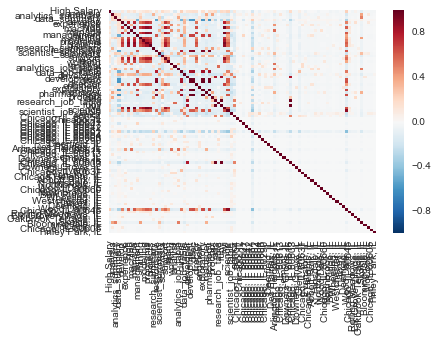

In [60]:
# hot mess
sns.heatmap(all_df.corr())

In [61]:
md_1 = LogisticRegression()

In [63]:
y = all_df['High Salary']
X = all_df[['analysis','analytics_summary','data_summary',
            'develop','experience','high','machine',
            'manage','management','mining','modeling',
            'programs','projects','research_summary',           
            'responsible','scientist_summary','scientists',
            'support','team','working','analyst',
            'analytics_job_table','clinical','data_job_table',             
            'developer','development','direc','director',              
            'engineer','exploratory','manager','pharmacology',               
            'product','rails','research_job_table',
            'ruby','rwi','science','scientist_job_table']]

In [64]:
md_1.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
md_1.score(X,y)

0.74641675854465273

In [67]:
predictions = md_1.predict(X)
predictions[0:]

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
predict_proba = md_1.predict_proba(X)
predict_proba[0:]

array([[ 0.70391431,  0.29608569],
       [ 0.82526419,  0.17473581],
       [ 0.79790724,  0.20209276],
       ..., 
       [ 0.37684419,  0.62315581],
       [ 0.40037203,  0.59962797],
       [ 0.37684419,  0.62315581]])

In [69]:
# Confusion Matrix!
y_pred = md_1.predict(X)
confusion = np.array(confusion_matrix(y, y_pred))
print confusion

[[1036  177]
 [ 283  318]]


In [70]:
print classification_report(y, y_pred)

             precision    recall  f1-score   support

          0       0.79      0.85      0.82      1213
          1       0.64      0.53      0.58       601

avg / total       0.74      0.75      0.74      1814



In [74]:
md_1 = Ridge()
md_1

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [75]:
alphas = np.array([100, 10, 1,0.1,0.01,0.001,0.0001,0])

alphas

array([  1.00000000e+02,   1.00000000e+01,   1.00000000e+00,
         1.00000000e-01,   1.00000000e-02,   1.00000000e-03,
         1.00000000e-04,   0.00000000e+00])

In [76]:
grid = GridSearchCV(estimator=md_1, 
                    param_grid={'alpha': alphas,
                                'fit_intercept': [True, False],
                                'normalize': [True, False]},
                    verbose=10
                   )

In [77]:
target = all_df['High Salary']

In [80]:
grid.fit(X, target)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] normalize=True, alpha=100.0, fit_intercept=True .................
[CV]  normalize=True, alpha=100.0, fit_intercept=True, score=0.000000 -   0.0s
[CV] normalize=True, alpha=100.0, fit_intercept=True .................
[CV]  normalize=True, alpha=100.0, fit_intercept=True, score=0.000000 -   0.0s
[CV] normalize=True, alpha=100.0, fit_intercept=True .................
[CV]  normalize=True, alpha=100.0, fit_intercept=True, score=-200.333333 -   0.0s
[CV] normalize=False, alpha=100.0, fit_intercept=True ................
[CV]  normalize=False, alpha=100.0, fit_intercept=True, score=0.000000 -   0.0s
[CV] normalize=False, alpha=100.0, fit_intercept=True ................
[CV]  normalize=False, alpha=100.0, fit_intercept=True, score=0.000000 -   0.0s
[CV] normalize=False, alpha=100.0, fit_intercept=True ................
[CV]  normalize=False, alpha=100.0, fit_intercept=True, score=-200.333333 -   0.0s
[CV] normalize=True, alpha=100

[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed:    0.2s


[CV]  normalize=False, alpha=1.0, fit_intercept=True, score=0.000000 -   0.0s
[CV] normalize=False, alpha=1.0, fit_intercept=True ..................
[CV]  normalize=False, alpha=1.0, fit_intercept=True, score=0.000000 -   0.0s
[CV] normalize=False, alpha=1.0, fit_intercept=True ..................
[CV]  normalize=False, alpha=1.0, fit_intercept=True, score=-200.333333 -   0.0s
[CV] normalize=True, alpha=1.0, fit_intercept=False ..................
[CV]  normalize=True, alpha=1.0, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=True, alpha=1.0, fit_intercept=False ..................
[CV]  normalize=True, alpha=1.0, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=True, alpha=1.0, fit_intercept=False ..................
[CV]  normalize=True, alpha=1.0, fit_intercept=False, score=-200.333333 -   0.0s
[CV] normalize=False, alpha=1.0, fit_intercept=False .................
[CV]  normalize=False, alpha=1.0, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=False,

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s


[CV]  normalize=True, alpha=0.01, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=True, alpha=0.01, fit_intercept=False .................
[CV]  normalize=True, alpha=0.01, fit_intercept=False, score=-200.333333 -   0.0s
[CV] normalize=False, alpha=0.01, fit_intercept=False ................
[CV]  normalize=False, alpha=0.01, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=False, alpha=0.01, fit_intercept=False ................
[CV]  normalize=False, alpha=0.01, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=False, alpha=0.01, fit_intercept=False ................
[CV]  normalize=False, alpha=0.01, fit_intercept=False, score=-200.333333 -   0.0s
[CV] normalize=True, alpha=0.001, fit_intercept=True .................
[CV]  normalize=True, alpha=0.001, fit_intercept=True, score=0.000000 -   0.0s
[CV] normalize=True, alpha=0.001, fit_intercept=True .................
[CV]  normalize=True, alpha=0.001, fit_intercept=True, score=0.000000 -   0.0s
[CV] normali

[Parallel(n_jobs=1)]: Done  60 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  71 tasks       | elapsed:    0.6s


[CV] normalize=False, alpha=0.0001, fit_intercept=True ...............
[CV]  normalize=False, alpha=0.0001, fit_intercept=True, score=-200.333333 -   0.0s
[CV] normalize=True, alpha=0.0001, fit_intercept=False ...............
[CV]  normalize=True, alpha=0.0001, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=True, alpha=0.0001, fit_intercept=False ...............
[CV]  normalize=True, alpha=0.0001, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=True, alpha=0.0001, fit_intercept=False ...............
[CV]  normalize=True, alpha=0.0001, fit_intercept=False, score=-200.333333 -   0.0s
[CV] normalize=False, alpha=0.0001, fit_intercept=False ..............
[CV]  normalize=False, alpha=0.0001, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=False, alpha=0.0001, fit_intercept=False ..............
[CV]  normalize=False, alpha=0.0001, fit_intercept=False, score=0.000000 -   0.0s
[CV] normalize=False, alpha=0.0001, fit_intercept=False ..............
[CV]  nor

[Parallel(n_jobs=1)]: Done  84 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e+02,   1.00000e+01,   1.00000e+00,   1.00000e-01,
         1.00000e-02,   1.00000e-03,   1.00000e-04,   0.00000e+00]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [81]:
# summarize the results of the grid search
print(grid.best_score_)

-66.704152885


In [82]:
print(grid.best_estimator_.alpha)

100.0


In [83]:
grid.best_estimator_.fit_intercept

True

In [84]:
grid.best_estimator_.normalize

True

In [85]:
grid.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [86]:
best_garbage = grid.best_estimator_

In [87]:
best_garbage.fit(X,target)

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [88]:
best_garbage.score(X,target)

0.012486473735251136

That's just plain ick. Need to change up some variables and try again!

In [95]:
md_2 = LogisticRegression()

In [96]:
y = all_df['High Salary']
X = all_df[['analysis','develop','machine',
            'mining','modeling','programs',
            'analyst','analytics_job_table',
            'data_job_table','developer','director','engineer',
            'rails','ruby','scientist_job_table']]

In [97]:
md_2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
# score looks decent
md_2.score(X,y)

0.71334068357221614

In [99]:
md_3 = LogisticRegression()

In [100]:
y = all_df['High Salary']
X = all_df[['director','engineer','machine',
            'modeling','analyst','analytics_job_table',
            'developer','rails','ruby']]

In [101]:
md_3.fit (X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
md_3.score(X,y)

0.70672546857772878